In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen#for opening urls
from bs4 import BeautifulSoup
import re#for manipulating regular expressions

In [67]:
url= "https://www.hubertiming.com/results/2018MLK"
htmlcontent=urlopen(url)

In [68]:
soup=BeautifulSoup(htmlcontent)

In [69]:
title=soup.title
title

<title>Race results for the 2018 MLK Dream Run!</title>

In [70]:
title.text

'Race results for the 2018 MLK Dream Run!'

In [71]:
links=soup.find_all('a',href=True)
links

[<a href="https://www.mlkdreamrun.com/" target="_blank">MLK Dream Run</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2018MLK10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K</a>,
 <a class="btn btn-primary btn-lg" href="/results/2018MLK15K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 15K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2018MLK" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a data-url="/results/2018MLK" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Results</a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="https://www.hubertiming.com//sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://faceboo

In [72]:
for link in links:
    print(link.get('href'))
#     similar to 
#     print(link['href'])

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [73]:
data=[]
allrows=soup.find_all('tr')
for row in allrows:
    rowlist=row.find_all('td')
    dataRow=[]
    for cell in rowlist:
        dataRow.append(cell.text.replace('\r\n',' '))      
    data.append(dataRow)
titles=data[0]
data=data[4:]
print(data)


[[], ['1', '1191', '                      MAX RANDOLPH                  ', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '                      1 of 78                  ', 'M 21-39', '                      1 of 33                  ', '0:08', '16:56'], ['2', '1080', '                      NEED NAME KAISER RUNNER                  ', 'M', '25', 'PORTLAND', 'OR', '5:39', '17:31', '                      2 of 78                  ', 'M 21-39', '                      2 of 33                  ', '0:09', '17:40'], ['3', '1275', '                      DAN FRANEK                  ', 'M', '52', 'PORTLAND', 'OR', '5:53', '18:15', '                      3 of 78                  ', 'M 40-54', '                      1 of 27                  ', '0:07', '18:22'], ['4', '1223', '                      PAUL TAYLOR                  ', 'M', '54', 'PORTLAND', 'OR', '5:58', '18:31', '                      4 of 78                  ', 'M 40-54', '                      2 of 27                  ', '0:07', '18:38'

In [74]:
df=pd.DataFrame(data)
print(df)

       0     1                                                  2     3   \
0    None  None                                               None  None   
1       1  1191                        MAX RANDOLPH            ...     M   
2       2  1080                        NEED NAME KAISER RUNNER ...     M   
3       3  1275                        DAN FRANEK              ...     M   
4       4  1223                        PAUL TAYLOR             ...     M   
..    ...   ...                                                ...   ...   
187   187  1254                        CYNTHIA HARRIS          ...     F   
188   188  1085                        EBONY LAWRENCE          ...     F   
189   189  1170                        ANTHONY WILLIAMS        ...     M   
190   190  2087                        LEESHA POSEY            ...     F   
191   191  1216                        ZULMA OCHOA             ...     F   

       4           5     6      7        8   \
0    None        None  None   None     N

In [75]:
header_list=[]
col_headers=soup.find_all('th')
for col_header in col_headers:
    header_list.append(col_header.text)
header_list

['Place',
 'Bib',
 'Name',
 'Gender',
 'Age',
 'City',
 'State',
 'Chip Pace',
 'Chip Time',
 'Gender Place',
 'Age Group',
 'Age Group Place',
 'Time to Start',
 'Gun Time']

In [76]:
df.columns=header_list
df

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,1191,MAX RANDOLPH ...,M,29,WASHINGTON,DC,5:25,16:48,1 of 78,M 21-39,1 of 33,0:08,16:56
2,2,1080,NEED NAME KAISER RUNNER ...,M,25,PORTLAND,OR,5:39,17:31,2 of 78,M 21-39,2 of 33,0:09,17:40
3,3,1275,DAN FRANEK ...,M,52,PORTLAND,OR,5:53,18:15,3 of 78,M 40-54,1 of 27,0:07,18:22
4,4,1223,PAUL TAYLOR ...,M,54,PORTLAND,OR,5:58,18:31,4 of 78,M 40-54,2 of 27,0:07,18:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,1254,CYNTHIA HARRIS ...,F,64,PORTLAND,OR,21:53,1:07:51,110 of 113 ...,F 55+,14 of 14,1:19,1:09:10
188,188,1085,EBONY LAWRENCE ...,F,30,PORTLAND,OR,22:00,1:08:12,111 of 113 ...,F 21-39,53 of 53,0:58,1:09:10
189,189,1170,ANTHONY WILLIAMS ...,M,39,PORTLAND,OR,22:19,1:09:11,78 of 78,M 21-39,33 of 33,0:08,1:09:19
190,190,2087,LEESHA POSEY ...,F,43,PORTLAND,OR,30:17,1:33:53,112 of 113 ...,F 40-54,36 of 37,0:00,1:33:53


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Chip Time        191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.1+ KB


In [78]:
df.shape

(192, 14)

In [79]:
df2=df.dropna(axis=0,how='any')
df2.shape

(191, 14)

In [80]:
# df2['ChipTimeinMinutes']=pd.to_timedelta(df2['Chip Time'])
# df2['ChipTimeinMinutes']=df2['ChipTimeinMinutes'].astype('timedelta64[s]')/60
# df2['ChipTimeinMinutes'].info()
pd.to_timedelta(df2['Chip Time']).dt.total_seconds()

ValueError: expected hh:mm:ss format

In [81]:
plt.bar(df2['Gender'],df2['ChipTimeinMinutes'])
plt.xlabel('Gender')
plt.ylabel('ChipTimeinMinutes')
plt.title("Comparison of average minutes run by females and males")

KeyError: 'ChipTimeinMinutes'

In [82]:
df2.describe(include=[np.number])

ValueError: No objects to concatenate

KeyError: 'Column not found: ChipTimeinMinutes'

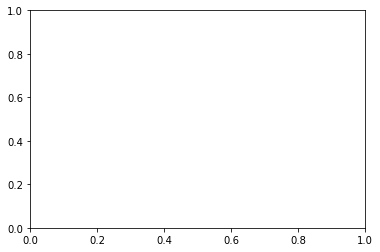

In [83]:
df2.boxplot(column='ChipTimeinMinutes', by='Gender')
plt.ylabel('Run time')

In [ ]:
df2['Age_i']=round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how='any',inline=True)
plt.scatter(df2['ChipTimeinMinutes'],df2['Age_i'])
plt.show()

In [ ]:
plt.scatter(df2['ChipTimeinMinutes'],df2['Age_i'])
plt.show()